In [1]:
#Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
crime_data = pd.read_csv(r"C:\Users\user\Downloads\crimes_against_women_2001-2014.csv")
crime_data.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [3]:
crime_data.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [4]:
#Check for duplicated entries
crime_data.duplicated().sum()

0

In [5]:
#Display the list of all states in alphabetical order
list_of_states= crime_data['STATE/UT'].unique()
list_of_states.sort()
print(list_of_states)

['A & N ISLANDS' 'A & N Islands' 'A&N Islands' 'ANDHRA PRADESH'
 'ARUNACHAL PRADESH' 'ASSAM' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'BIHAR' 'Bihar' 'CHANDIGARH' 'CHHATTISGARH' 'Chandigarh' 'Chhattisgarh'
 'D & N HAVELI' 'D&N Haveli' 'DAMAN & DIU' 'DELHI' 'Daman & Diu'
 'Delhi UT' 'GOA' 'GUJARAT' 'Goa' 'Gujarat' 'HARYANA' 'HIMACHAL PRADESH'
 'Haryana' 'Himachal Pradesh' 'JAMMU & KASHMIR' 'JHARKHAND'
 'Jammu & Kashmir' 'Jharkhand' 'KARNATAKA' 'KERALA' 'Karnataka' 'Kerala'
 'LAKSHADWEEP' 'Lakshadweep' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR'
 'MEGHALAYA' 'MIZORAM' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'NAGALAND' 'Nagaland' 'ODISHA' 'Odisha'
 'PUDUCHERRY' 'PUNJAB' 'Puducherry' 'Punjab' 'RAJASTHAN' 'Rajasthan'
 'SIKKIM' 'Sikkim' 'TAMIL NADU' 'TRIPURA' 'Tamil Nadu' 'Telangana'
 'Tripura' 'UTTAR PRADESH' 'UTTARAKHAND' 'Uttar Pradesh' 'Uttarakhand'
 'WEST BENGAL' 'West Bengal']


In [6]:
#statistical description of the numerical data in the dataset
crime_data.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [7]:
crime_data.dtypes

Unnamed: 0                                              int64
STATE/UT                                               object
DISTRICT                                               object
Year                                                    int64
Rape                                                    int64
Kidnapping and Abduction                                int64
Dowry Deaths                                            int64
Assault on women with intent to outrage her modesty     int64
Insult to modesty of Women                              int64
Cruelty by Husband or his Relatives                     int64
Importation of Girls                                    int64
dtype: object

In [8]:
#Dropping 'Unnamed: 0 '  name
crime_data.drop('Unnamed: 0', axis = 1, inplace = True)

**Data Cleaning on STATE/UT Column**

In India we have only 36 States/UT but there is a total of 72 unique States/UT present in the dataset, so we take a deep dive into finding the errors and fixing it. It was noticed that some of the States/UT were repeated in another case (i.e we had pairs of the same state in both upper and lower cases) and this was fixed.

In [9]:
#Checking for the number of States/UT present in the dataset
len(list_of_states)

72

In [10]:
def convert_to_lowercase(row):
    '''This function takes in a row argument and converts that row into a lowercase'''
    row = row['STATE/UT'].strip()
    row = row.lower()
    return row

crime_data['STATE/UT'] = crime_data.apply(convert_to_lowercase, axis=1)

In [11]:
#Replacing column names with the appropriate name
crime_data['STATE/UT'].replace("a&n islands", "a & n islands", inplace = True)
crime_data['STATE/UT'].replace("d&n haveli", "d & n haveli", inplace = True)
crime_data['STATE/UT'].replace("delhi ut", "delhi", inplace = True)


In [12]:
#Checking for the number of States/UT now present in the dataset after cleaning
len(list(crime_data["STATE/UT"].unique()))

36

In [13]:
#Create a new column named Total which represents the total number of crimes
crime_data["Total"]=crime_data["Rape"]+crime_data["Kidnapping and Abduction"]+crime_data["Dowry Deaths"]+crime_data["Assault on women with intent to outrage her modesty"]+crime_data["Insult to modesty of Women"]+crime_data["Cruelty by Husband or his Relatives"]+crime_data["Importation of Girls"]

**YEAR BY YEAR ANALYSIS**

In [16]:
#total_crimes
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','Total']

annual_crimedata=pd.DataFrame()
for crime in crimes:
    annual_crimes=crime_data.groupby(['Year'])[crime].sum()
    annual_crimedata[crime]=annual_crimes

print('Total number of crimes from 2001 to 2014 ')
print()
annual_crimedata

Total number of crimes from 2001 to 2014 



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


# VISUALIZATIONS

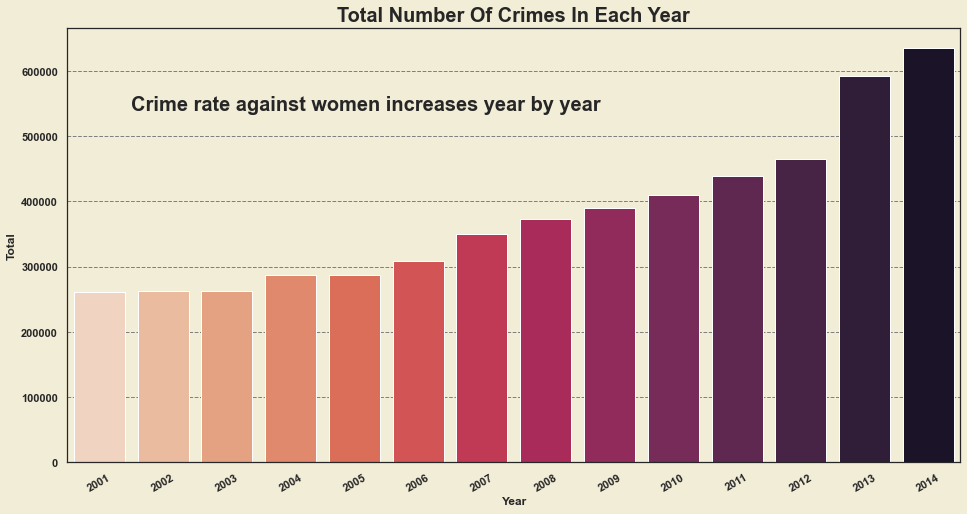

In [17]:
#Bar plot of total crimes commited yearly
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=np.array([i for i in range(lower_year, upper_year+1)])

a=sns.barplot(data=annual_crimedata,x=arr,y='Total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation =30)
plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Total",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)

plt.show()

**Annual crime variation**

In [18]:
def plotting_cat_features(nrows,ncols,cat_columns):
    
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(16,25))
    f.patch.set_facecolor('#F2EDD7FF')
    
    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            a1=sns.barplot(data=annual_crimedata,x=annual_crimedata.index,y=cat_columns[i*(nrows-2)+j],palette='rocket_r',ax=ax[i][j])

        
            #Dealing with spines
            ax[i][j].grid(linestyle="--",axis='y',color='gray')
    plt.show()

How was each crime varying year by year?



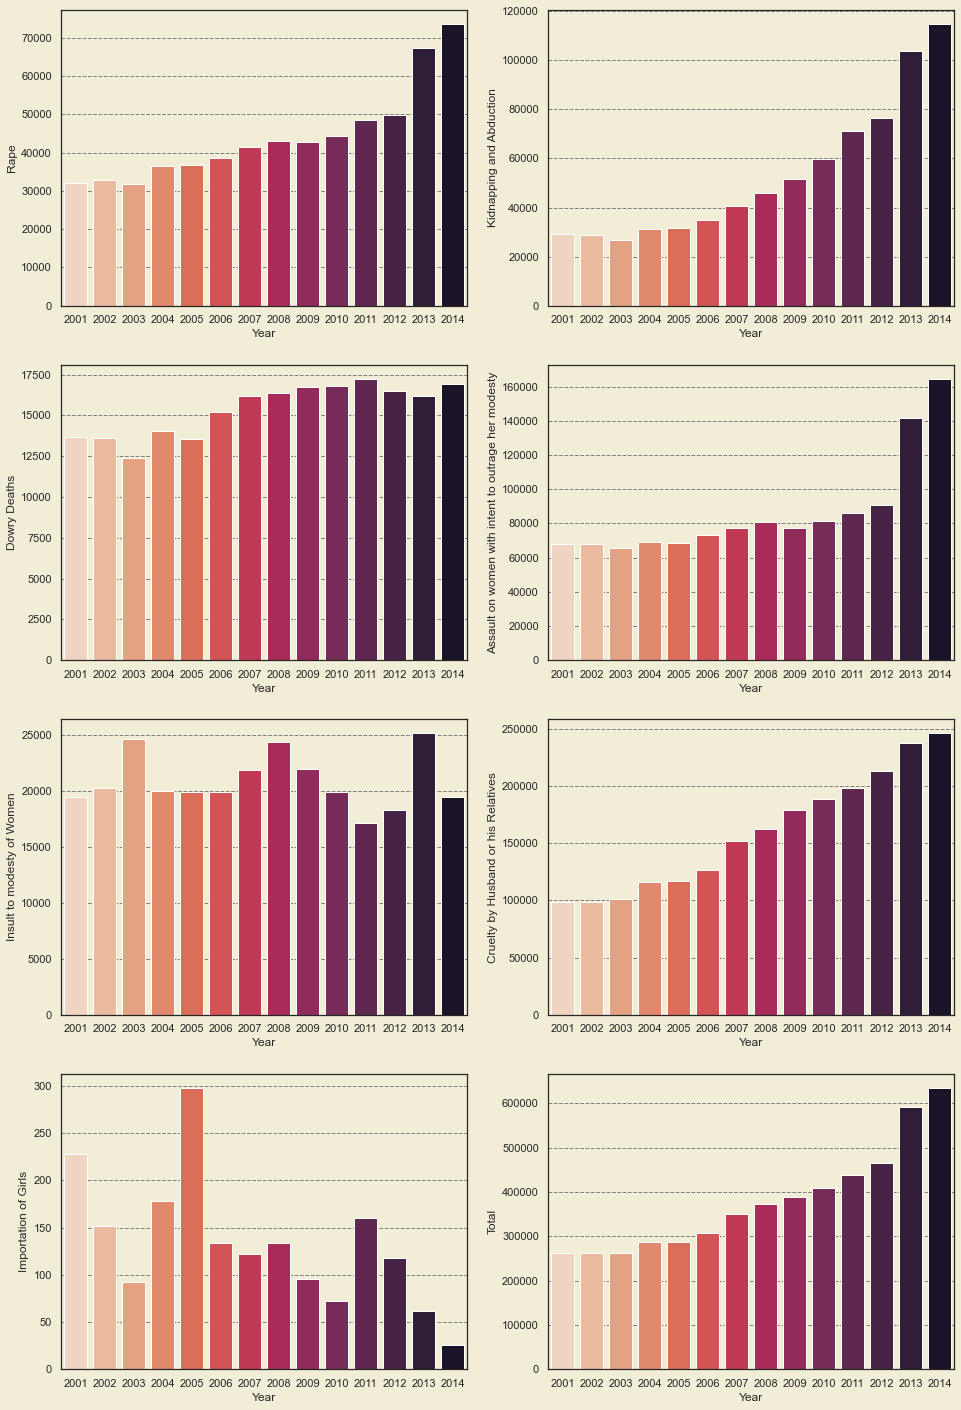

In [19]:
print("How was each crime varying year by year?")
print()
plotting_cat_features(4,2,crimes)

**CRIME RATE INCREMENT YEAR BY YEAR**

<ipython-input-20-dbcbdde09886>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


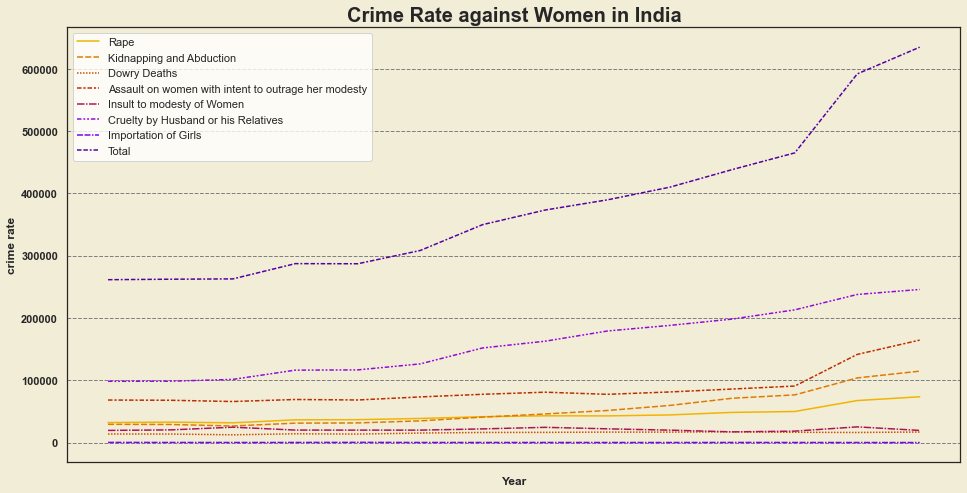

In [20]:

sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014

arr=np.array([i for i in range(lower_year,upper_year+1)])

a=sns.lineplot(data=annual_crimedata,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in India",fontweight='bold',fontsize=20)
plt.show()

**DISTRIBUTION OF EACH CRIME CATEGORY FROM 2001 TO 2014 REPRESENTED IN A PIE CHART**

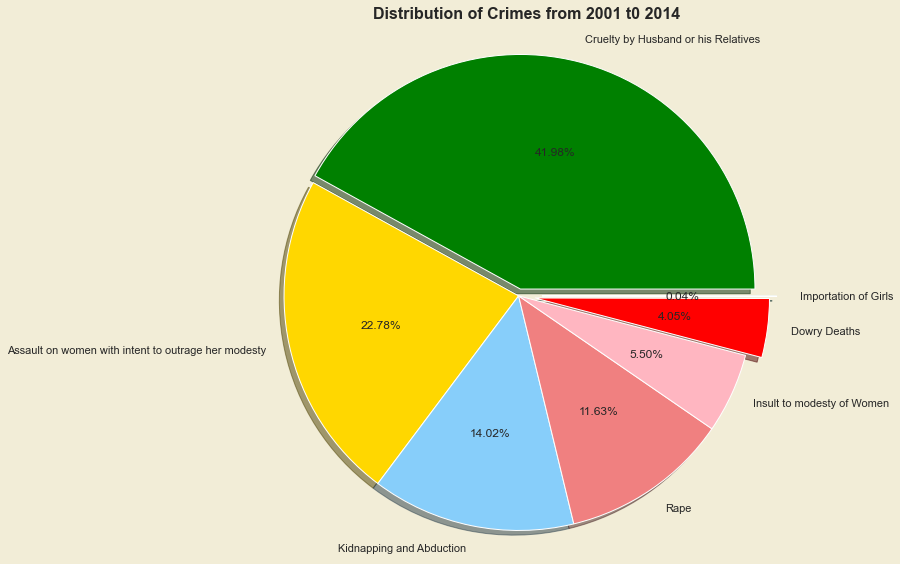

In [21]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

top_crimes=pd.DataFrame(columns=['crimes',"total"])
for crime in crimes:
    top_crimes=top_crimes.append({'crimes':crime ,'total':crime_data[crime].sum(axis=0)},ignore_index=True)
    
top_crimes=top_crimes.sort_values(by='total',ascending=False)

top_crimes

list_crimes_number=list(top_crimes['total'])
list_crimes=list(top_crimes['crimes'])
fig=plt.figure(figsize=(12,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

colors=['green', 'gold', 'lightskyblue', 'lightcoral','lightpink','red','teal']
#patches,text=plt.pie(list_crimes_number,colors=colors,labels=list_crimes_number,autopct='%1.1f%%')
plt.pie(list_crimes_number,colors=colors,labels=list_crimes,autopct='%1.2f%%', explode=[0.03,0.0,0.0,0.0,0.0,0.07,0.1], shadow=True)
#plt.legend()
plt.title("Distribution of Crimes from 2001 t0 2014",fontweight='bold',fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


**TOTAL NUMBER OF EACH CRIME CATEGORY FROM 2001 TO 2014 REPRESENTED WITH A BAR CHART**

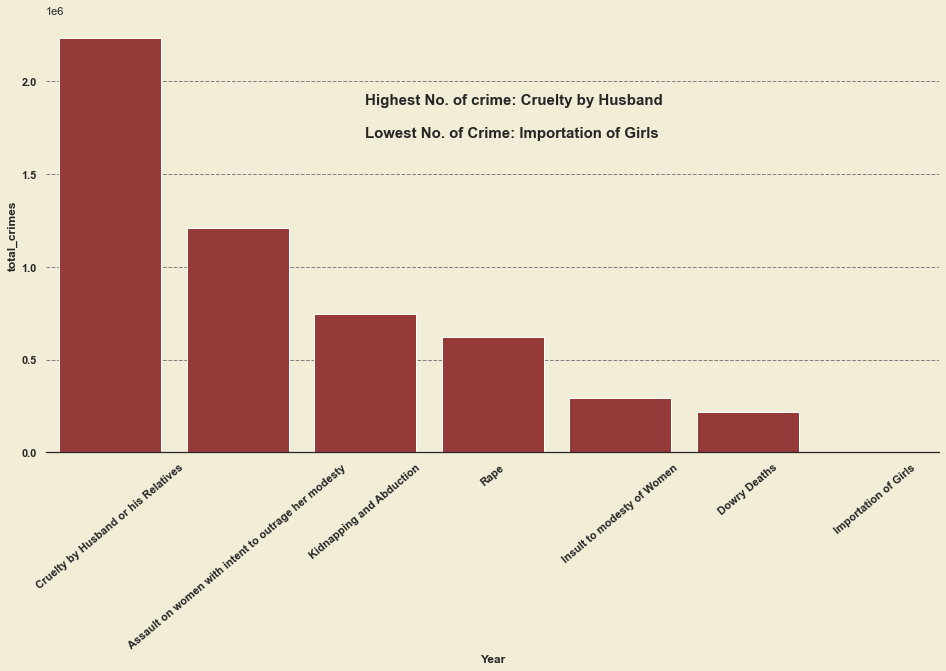

In [22]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=top_crimes,y='total',x='crimes', color='brown')
ax.set_xticklabels(ax.get_xticklabels(),rotation =40)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.text(2,1700000, "Highest No. of crime: Cruelty by Husband\n\nLowest No. of Crime: Importation of Girls",fontweight='bold',fontsize=15)

plt.show()


**COMPARISON BETWEEN CRIME CATEGORIES IN 2001 AND 2014**

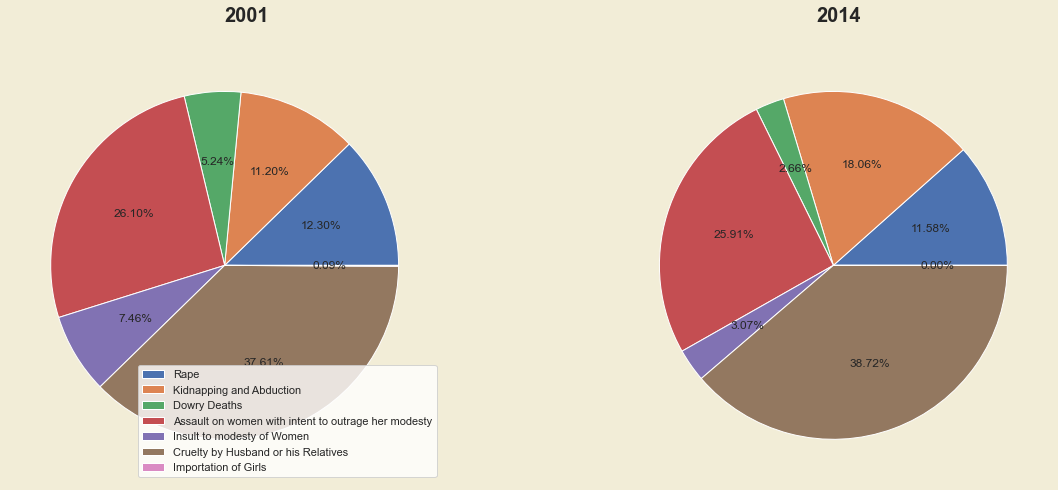

In [23]:

crimedata_2001=annual_crimedata.loc[annual_crimedata.index==2001]
crimedata_2014=annual_crimedata.loc[annual_crimedata.index==2014]

crimedata_2001=crimedata_2001.drop(["Total"],axis=1)
crimedata_2014=crimedata_2014.drop(["Total"],axis=1)
crimes_in_2001=list(crimedata_2001.iloc[0])
crimes_in_2014=list(crimedata_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%')
ax[0].text(0,1.4,"2001",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%')
ax[0].text(3.4,1.4,"2014",fontweight='bold',fontsize=20)
ax[0].legend(labels=crimedata_2001.columns,loc='lower right')

plt.show()

**STATE BY STATE ANALYSIS**

In [24]:
print("*** Total number of Unique States/Union Territories we have in Data ***")
print()
states=crime_data['STATE/UT'].unique()
print("Number of states/territories without duplicates: ", len(states))
print()
print(states)

*** Total number of Unique States/Union Territories we have in Data ***

Number of states/territories without duplicates:  36

['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhya pradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamil nadu'
 'tripura' 'uttar pradesh' 'uttarakhand' 'west bengal' 'a & n islands'
 'chandigarh' 'd & n haveli' 'daman & diu' 'delhi' 'lakshadweep'
 'puducherry' 'telangana']


In [25]:

crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','Total']

state_crimedata=pd.DataFrame()
for crime in crimes:
    state_crimes=crime_data.groupby(['STATE/UT'])[crime].sum()
    state_crimedata[crime]=state_crimes

print("***** Each cateogry of crimes in each state from 2001 to 2014 *****")
print()
state_crimedata=state_crimedata.sort_values(by='Total',ascending=False)
state_crimedata.reset_index()


***** Each cateogry of crimes in each state from 2001 to 2014 *****



,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,uttar pradesh,51150,135906,57256,91212,53130,193738,6,582398
1,andhra pradesh,32150,34504,13844,126952,86964,280906,34,575354
2,west bengal,47876,61158,12308,66908,5348,344124,254,537976
3,rajasthan,45684,66278,11854,83362,794,262200,14,470186
4,madhya pradesh,90996,35608,21090,195478,20964,102816,134,467086
5,maharashtra,48974,30368,9696,114704,32634,193202,6,429584
6,assam,40190,62074,3268,38256,254,115300,22,259364
7,kerala,20030,4452,700,80438,7930,111626,0,225176
8,gujarat,11644,34670,1108,23186,3230,146468,0,220306
9,bihar,30758,57086,32206,16958,694,69770,904,208376


In [26]:
def without_hue_state(data,feature,ax):
    
    total=data['Total'].sum()
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,percentage,ha='center',fontweight='bold',fontsize=10)

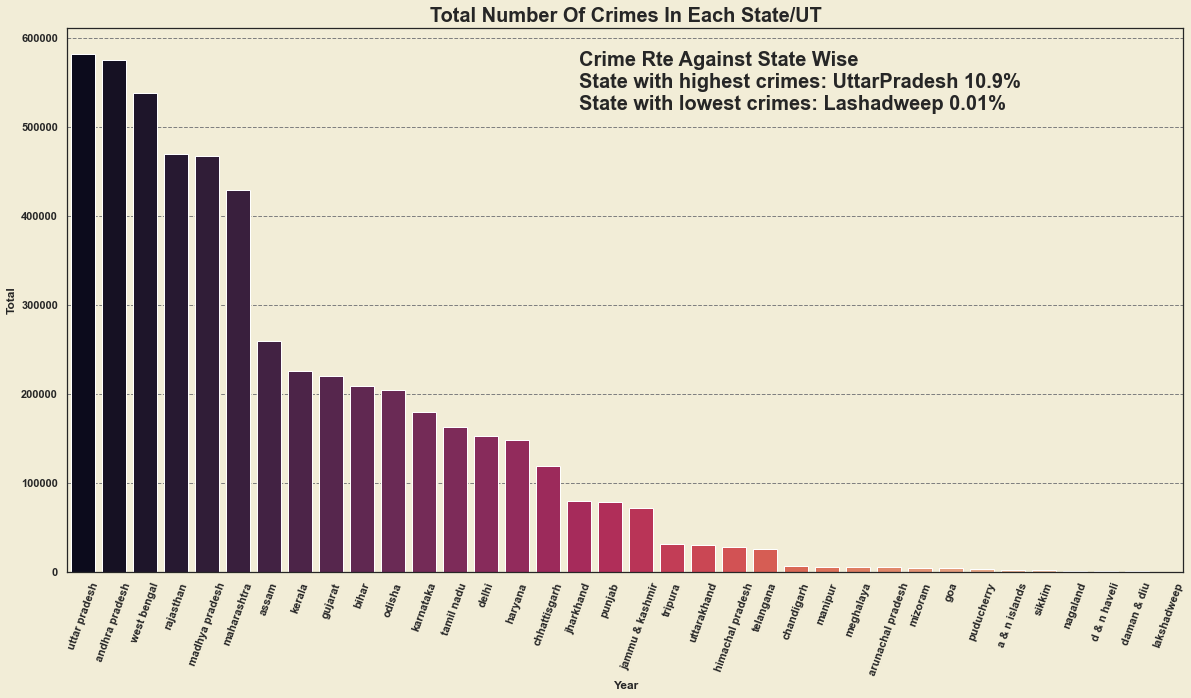

In [27]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(20,10))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=state_crimedata,x=state_crimedata.index,y='Total',palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.text(16,520000,"Crime Rte Against State Wise\nState with highest crimes: UttarPradesh 10.9%\nState with lowest crimes: Lashadweep 0.01%",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Total",fontweight='bold')
plt.title("Total Number Of Crimes In Each State/UT",fontweight='bold',fontsize=20)

plt.show()

**TOP 5 STATES/UT WITH HIGHEST CRIME RATES 2001 to 2014**
1. Uttar Pradesh
2. Andhra Pradesh
3. West Bengal
4. Rajasthan
5. Madhya Pradesh

In [28]:
state_crimedata.head()


,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
uttar pradesh,51150,135906,57256,91212,53130,193738,6,582398
andhra pradesh,32150,34504,13844,126952,86964,280906,34,575354
west bengal,47876,61158,12308,66908,5348,344124,254,537976
rajasthan,45684,66278,11854,83362,794,262200,14,470186
madhya pradesh,90996,35608,21090,195478,20964,102816,134,467086


**FIVE STATES/UT WITH LEAST CRIME RATES 2001 to 2014**
1. Sikkim
2. Nagaland
3. d&nhaveli
4. daman&diu
5. lakshadweep

In [29]:
state_crimedata.tail()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
sikkim,570,180,4,586,34,108,0,1482
nagaland,562,190,2,260,24,32,2,1072
d & n haveli,132,224,2,106,12,90,0,566
daman & diu,60,44,6,40,4,76,0,230
lakshadweep,20,2,0,14,4,14,0,54


**TOP FIVE STATES WITH HIGHEST NUMBER OF RAPE CRIME**

In [30]:
state_rape=state_crimedata.sort_values(by="Rape",ascending=False)
high_rape=state_rape.iloc[:,:1].head()
high_rape.reset_index(inplace=True)
high_rape

,STATE/UT,Rape
0,madhya pradesh,90996
1,uttar pradesh,51150
2,maharashtra,48974
3,west bengal,47876
4,rajasthan,45684


**TOP FIVE STATES WITH HIGHEST NUMBER OF ASSAULT ON WOMEN CRIME**

In [31]:
crime_state_assault=state_crimedata.sort_values(by='Assault on women with intent to outrage her modesty',ascending=False)
high_assault=crime_state_assault.iloc[:,[3]].head()
high_assault

,Assault on women with intent to outrage her modesty
STATE/UT,
madhya pradesh,195478
andhra pradesh,126952
maharashtra,114704
uttar pradesh,91212
rajasthan,83362


**TOP FIVE STATES WITH HIGHEST NUMBER OF KIDNAPPING AND ABDUCTION CRIME**

In [32]:
state_kidnapping=state_crimedata.sort_values(by='Kidnapping and Abduction',ascending=False)
high_kidnapping=state_kidnapping.iloc[:,[1]].head()
high_kidnapping

,Kidnapping and Abduction
STATE/UT,
uttar pradesh,135906
rajasthan,66278
assam,62074
west bengal,61158
bihar,57086


**TOP FIVE STATES WITH HIGHEST NUMBER OF DOWRY DEATHS**

In [33]:
state_dowry=state_crimedata.sort_values(by='Dowry Deaths',ascending=False)
high_dowry=state_dowry.iloc[:,[2]].head()
high_dowry

,Dowry Deaths
STATE/UT,
uttar pradesh,57256
bihar,32206
madhya pradesh,21090
andhra pradesh,13844
west bengal,12308


**TOP FIVE STATES WITH HIGHEST NUMBER OF INSULT TO MODESTY OF WOMEN**

In [34]:
state_modesty=state_crimedata.sort_values(by='Insult to modesty of Women',ascending=False)
high_modesty=state_modesty.iloc[:,[4]].head()
high_modesty

,Insult to modesty of Women
STATE/UT,
andhra pradesh,86964
uttar pradesh,53130
maharashtra,32634
tamil nadu,21170
madhya pradesh,20964


**TOP FIVE STATES WITH HIGHEST NUMBER OF CRUELTY BY HUSBAND CRIME**

In [35]:
state_cruelty =state_crimedata.sort_values(by='Cruelty by Husband or his Relatives',ascending=False)
high_cruelty=state_cruelty.iloc[:,[5]].head()
high_cruelty

,Cruelty by Husband or his Relatives
STATE/UT,
west bengal,344124
andhra pradesh,280906
rajasthan,262200
uttar pradesh,193738
maharashtra,193202


**TOP FIVE STATES WITH HIGHEST NUMBER OF IMPORTATION OF GIRLS CRIME**

In [36]:
state_importation=state_crimedata.sort_values(by='Importation of Girls',ascending=False)
high_importation=state_importation.iloc[:,[6]].head()
high_importation


,Importation of Girls
STATE/UT,
bihar,904
jharkhand,298
west bengal,254
madhya pradesh,134
karnataka,94


### **We will examine top three states with highest crime rates**

#### Crime rate in **Uttar Pradesh (UP)**

In [37]:
crimedata_up=state_crimedata.loc[state_crimedata.index=='uttar pradesh']
crimedata_up

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
uttar pradesh,51150,135906,57256,91212,53130,193738,6,582398


In [38]:
crime_up=pd.DataFrame(columns=['Crimes in UP',"total"])
for crime in crimes:
    crime_up=crime_up.append({'Crimes in UP':crime ,'total':crimedata_up[crime].sum(axis=0)},ignore_index=True)
    
crime_up=crime_up.sort_values(by='total',ascending=False)

print("***** Total count of each crime from 2001 to 2014 in Uttar Pradesh *****")
print()
crime_up

***** Total count of each crime from 2001 to 2014 in Uttar Pradesh *****



,Crimes in UP,total
7,Total,582398
5,Cruelty by Husband or his Relatives,193738
1,Kidnapping and Abduction,135906
3,Assault on women with intent to outrage her mo...,91212
2,Dowry Deaths,57256
4,Insult to modesty of Women,53130
0,Rape,51150
6,Importation of Girls,6


**Percentage Distribution of Crimes in Uttar Pradesh from 2001 to 2014**

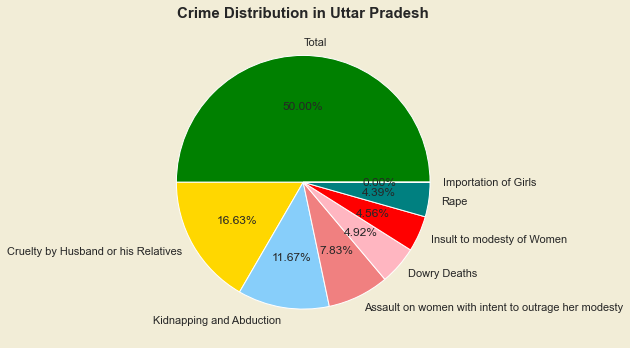

In [39]:
fig=plt.figure(figsize=(20,5))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(crime_up['total'],colors=colors,labels=crime_up['Crimes in UP'],autopct='%1.2f%%')
plt.title("Crime Distribution in Uttar Pradesh",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.show()

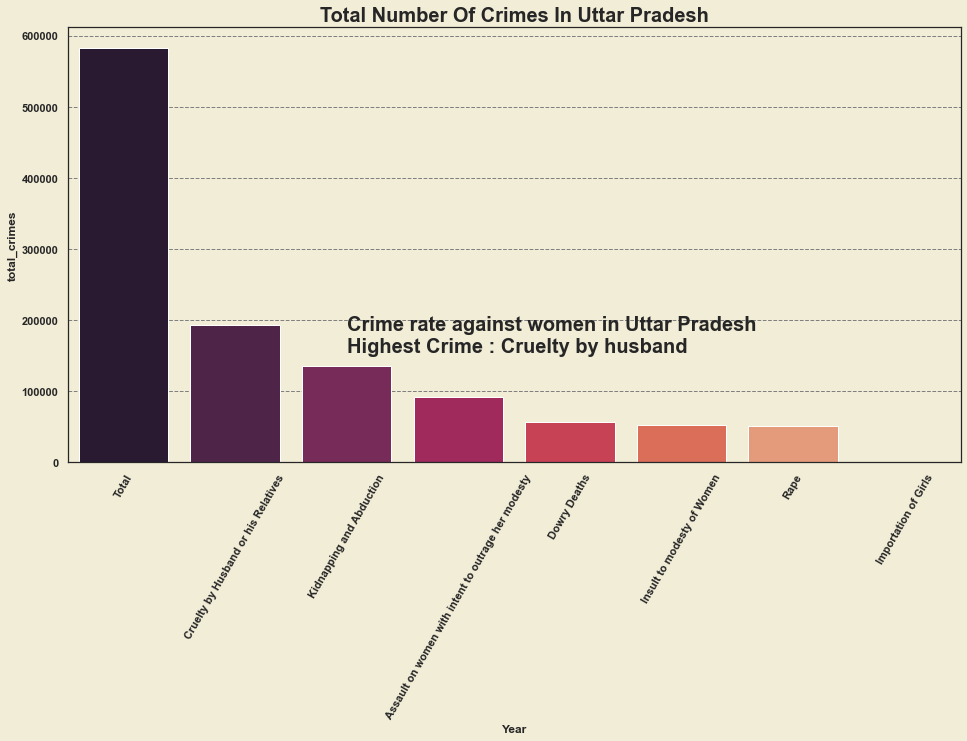

In [40]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=crime_up,x="Crimes in UP",y='total', palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
plt.text(2,155000,"Crime rate against women in Uttar Pradesh\nHighest Crime : Cruelty by husband",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Uttar Pradesh",fontweight='bold',fontsize=20)
plt.show()

**Total number of crimes from in Uttar Pradesh year wise 2001 to 2014**

In [41]:
crimes_up=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','Total']

up_year_data=crime_data.loc[crime_data['STATE/UT']=='uttar pradesh']

up_yearwise_data=pd.DataFrame()
for i in crimes_up:
    crimes_up_data=up_year_data.groupby(['Year'])[i].sum()
    up_yearwise_data[i]=crimes_up_data

print("***** Total number of crimes from in Uttar Pradesh year wise 2001 to 2014*****")
print()
up_yearwise_data=up_yearwise_data.sort_values(by='Total',ascending=False)
up_yearwise_data

***** Total number of crimes from in Uttar Pradesh year wise 2001 to 2014*****



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2014,6934,21252,4938,17210,58,20942,0,71334
2013,6100,19474,4670,14606,50,17562,0,62462
2008,3742,8878,4474,5910,6748,16624,0,46376
2012,3926,15820,4488,6494,16,15322,0,46066
2009,3518,10156,4464,5564,5048,17132,0,45882
2011,4084,15050,4644,6910,6,14242,0,44936
2007,3296,6726,4152,5044,5764,15300,0,40282
2010,3126,10936,4434,5586,22,15956,0,40060
2001,3916,5758,4422,5740,5150,14730,0,39716


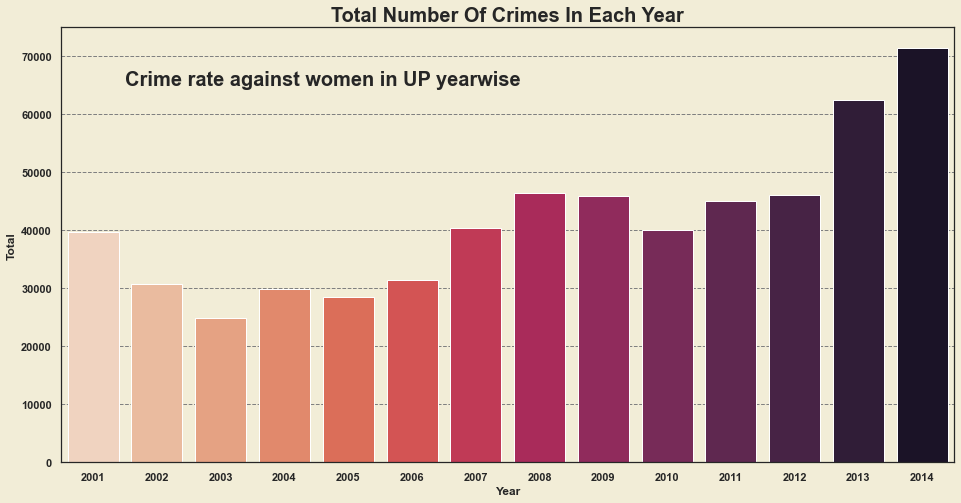

In [42]:
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=up_yearwise_data,x=up_yearwise_data.index,y='Total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels())
plt.text(0.5,65000,"Crime rate against women in UP yearwise",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Total",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)

plt.show()

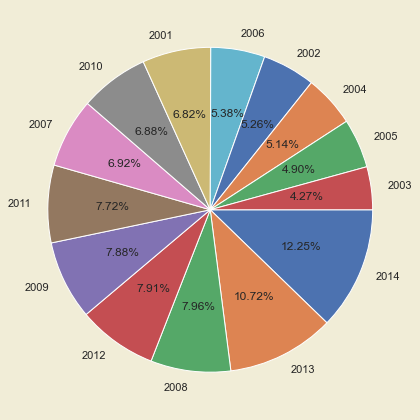

In [43]:
plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
plt.pie(up_yearwise_data["Total"],labels=up_yearwise_data.index,autopct='%1.2f%%',counterclock=False)
plt.tight_layout()

**Timeline Analysis of Different Categories of Crime at Different Period of Time**

<ipython-input-44-8ecf207fdc6e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


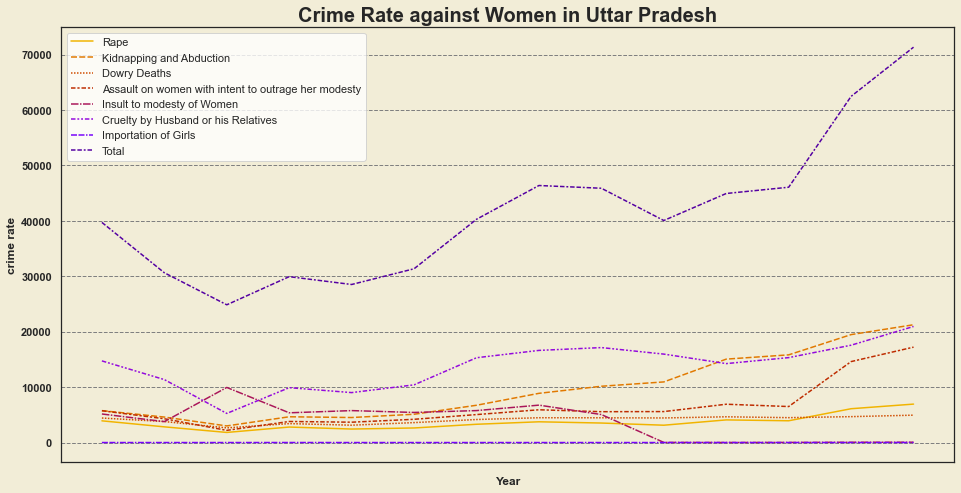

In [44]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=np.array([i for i in range(lower_year, upper_year+1)])

a=sns.lineplot(data=up_yearwise_data,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in Uttar Pradesh",fontweight='bold',fontsize=20)
plt.show()

**2001 VS 2014 In UP**

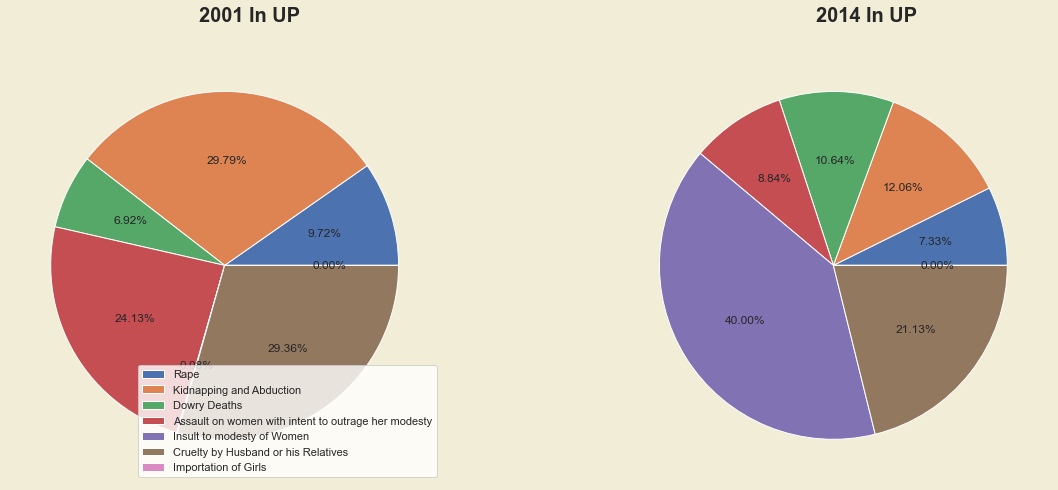

In [45]:
data_2001=up_yearwise_data.loc[annual_crimedata.index==2001]
data_2014=up_yearwise_data.loc[annual_crimedata.index==2014]

data_2001=data_2001.drop(["Total"],axis=1)
data_2014=data_2014.drop(["Total"],axis=1)
crimes_in_2001=list(data_2001.iloc[0])
crimes_in_2014=list(data_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%')
ax[0].text(-0.15,1.4,"2001 In UP",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%')
ax[0].text(3.4,1.4,"2014 In UP",fontweight='bold',fontsize=20)
ax[0].legend(labels=data_2001.columns,loc='lower right')

plt.show()

**2. Andhra Pradesh**

In [46]:
ap_data=state_crimedata.loc[state_crimedata.index=='andhra pradesh']

crime_ap_data=pd.DataFrame(columns=['Crimes in AP',"total"])
for i in crimes:
    crime_ap_data=crime_ap_data.append({'Crimes in AP':i ,'total':ap_data[i].sum(axis=0)},ignore_index=True)
    
crime_ap_data=crime_ap_data.sort_values(by='total',ascending=False)

print("***** Total count of each crime from 2001 to 2014 in Andhra Pradesh *****")
print()
crime_ap_data

***** Total count of each crime from 2001 to 2014 in Andhra Pradesh *****



,Crimes in AP,total
7,Total,575354
5,Cruelty by Husband or his Relatives,280906
3,Assault on women with intent to outrage her mo...,126952
4,Insult to modesty of Women,86964
1,Kidnapping and Abduction,34504
0,Rape,32150
2,Dowry Deaths,13844
6,Importation of Girls,34


**Percentage Distribution of Crimes in from 2001 to 2014**

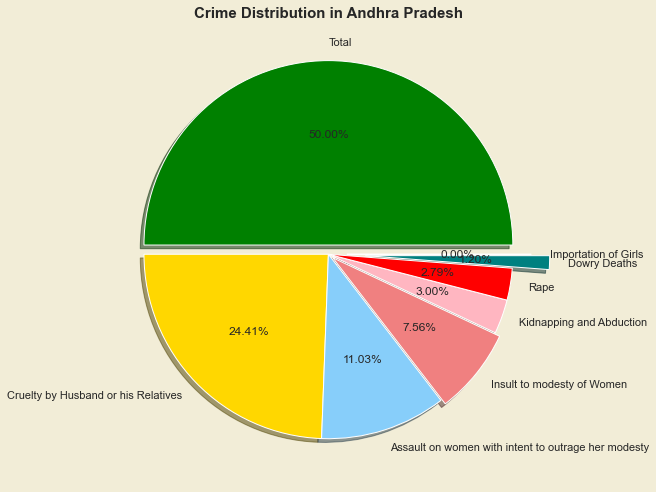

In [47]:
fig=plt.figure(figsize=(20,7))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


plt.pie(crime_ap_data['total'],colors=colors,labels=crime_ap_data['Crimes in AP'], explode= (0.05,0,0,0.03,0,0,0.2,0.1),autopct='%1.2f%%', shadow=True)
plt.title("Crime Distribution in Andhra Pradesh",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.show()

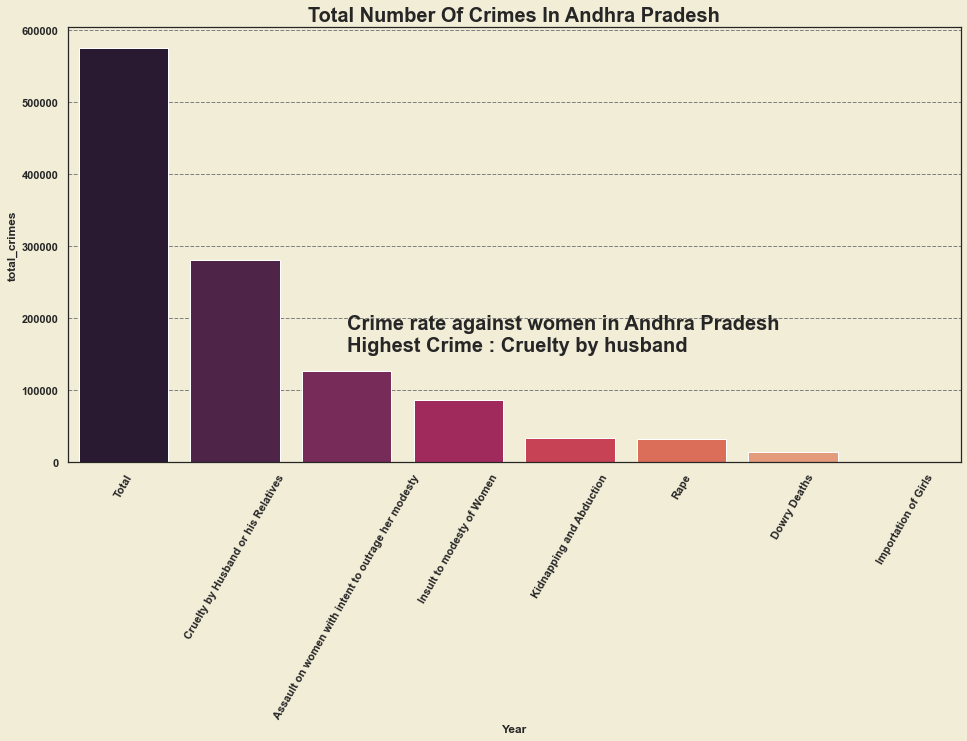

In [48]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=crime_ap_data,x="Crimes in AP",y='total',palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
plt.text(2,155000,"Crime rate against women in Andhra Pradesh\nHighest Crime : Cruelty by husband",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Andhra Pradesh",fontweight='bold',fontsize=20)

plt.show()

**Total number of crimes from in Andhra Pradesh year wise 2001 to 2014**

In [49]:
crime_ap=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','Total']

ap_year_data=crime_data.loc[crime_data['STATE/UT']=='andhra pradesh']

ap_yearwise_data=pd.DataFrame()
for i in crime_ap:
    crimes_ap_data=ap_year_data.groupby(['Year'])[i].sum()
    ap_yearwise_data[i]=crimes_ap_data

print("***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****")
print()
ap_yearwise_data=ap_yearwise_data.sort_values(by='Total',ascending=False)
ap_yearwise_data

***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2013,3270,3190,984,13860,9404,30168,0,60876
2011,2884,3224,1198,9698,7316,26752,0,51072
2012,2682,2806,1008,9632,7428,26778,0,50334
2010,2724,3062,1176,9268,9124,24160,0,49514
2009,2376,3052,1092,10294,7040,22594,0,46448
2007,2140,3128,1226,8812,6632,22670,0,44608
2008,2514,2792,1112,9460,7102,20612,0,43592
2006,2098,2658,1038,9068,4822,18328,0,38012
2005,1870,1990,886,7190,5016,17392,6,34350


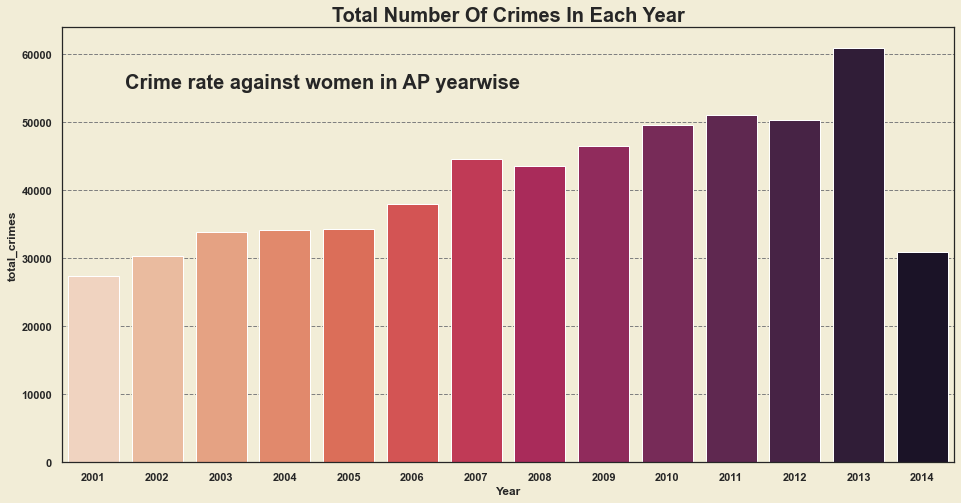

In [50]:
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")


ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=ap_yearwise_data,x=ap_yearwise_data.index,y='Total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels())
plt.text(0.5,55000,"Crime rate against women in AP yearwise",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)

plt.show()

**Crime Rate against Women in Andhra Pradesh**

<ipython-input-51-9aef26cedef9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


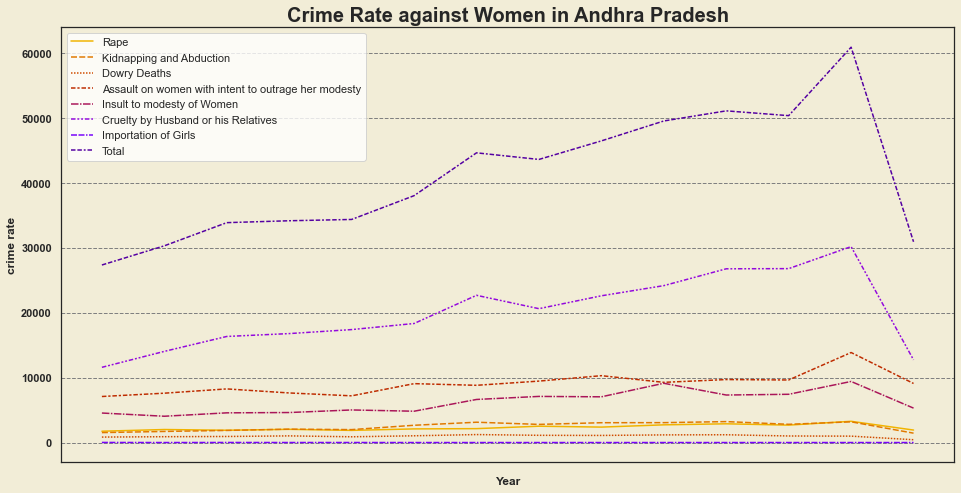

In [51]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.grid(linestyle="--",axis="y",color='gray')

a=sns.lineplot(data=ap_yearwise_data,palette='gnuplot_r',linestyle="dashed")

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in Andhra Pradesh",fontweight='bold',fontsize=20)
plt.show()

**2001 VS 2014 IN ANDHRA PRADESH**

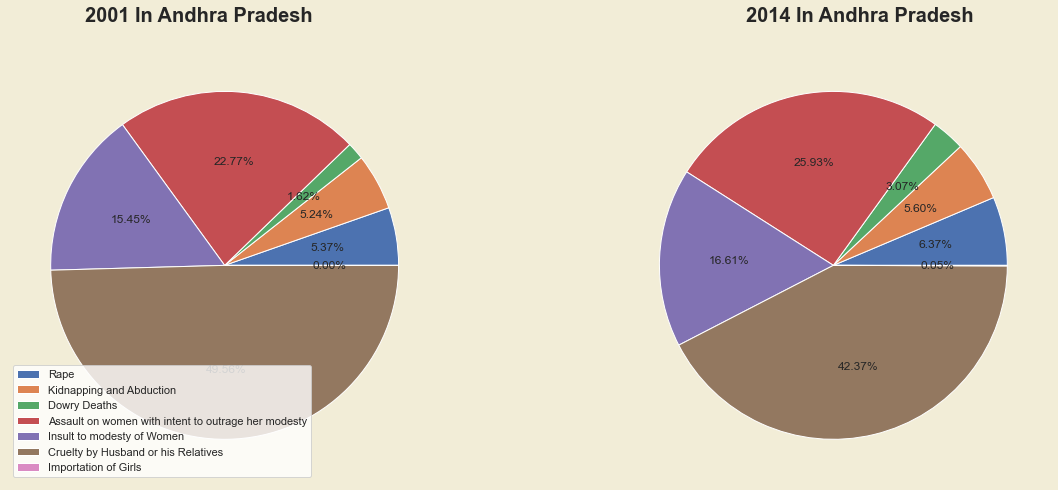

In [52]:
data_2001=ap_yearwise_data.loc[annual_crimedata.index==2001]
data_2014=ap_yearwise_data.loc[annual_crimedata.index==2014]

data_2001=data_2001.drop(["Total"],axis=1)
data_2014=data_2014.drop(["Total"],axis=1)
crimes_in_2001=list(data_2001.iloc[0])
crimes_in_2014=list(data_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%')
ax[0].text(-0.8,1.4,"2001 In Andhra Pradesh",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%')
ax[0].text(3,1.4,"2014 In Andhra Pradesh",fontweight='bold',fontsize=20)
ax[0].legend(labels=data_2001.columns,loc='best')

plt.show()

**3. West Bengal**

In [53]:
wb_data=state_crimedata.loc[state_crimedata.index=='west bengal']

crime_wb_data=pd.DataFrame(columns=['Crimes in WB',"total"])
for i in crimes:
    crime_wb_data=crime_wb_data.append({'Crimes in WB':i ,'total':wb_data[i].sum(axis=0)},ignore_index=True)
    
crime_wb_data=crime_wb_data.sort_values(by='total',ascending=False)

print("***** Total count of each crime from 2001 to 2014 in West Bengal *****")
print()
crime_wb_data

***** Total count of each crime from 2001 to 2014 in West Bengal *****



,Crimes in WB,total
7,Total,537976
5,Cruelty by Husband or his Relatives,344124
3,Assault on women with intent to outrage her mo...,66908
1,Kidnapping and Abduction,61158
0,Rape,47876
2,Dowry Deaths,12308
4,Insult to modesty of Women,5348
6,Importation of Girls,254


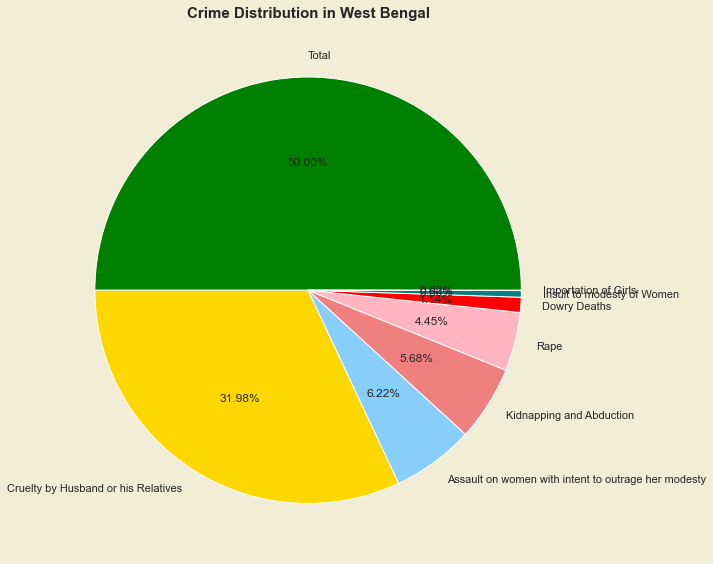

In [54]:
fig=plt.figure(figsize=(20,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

plt.pie(crime_wb_data['total'],colors=colors,labels=crime_wb_data['Crimes in WB'],autopct='%1.2f%%')
plt.title("Crime Distribution in West Bengal",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.show()

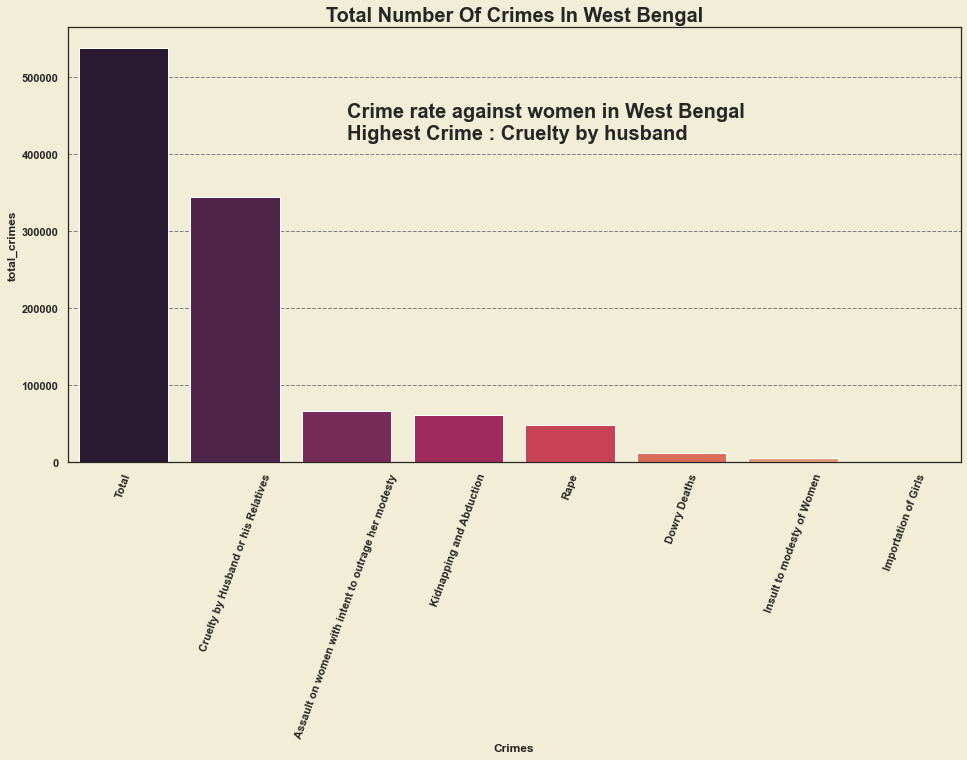

In [55]:
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=crime_wb_data,x="Crimes in WB",y='total',palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.text(2,420000,"Crime rate against women in West Bengal\nHighest Crime : Cruelty by husband",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Crimes",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In West Bengal",fontweight='bold',fontsize=20)

plt.show()

***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****



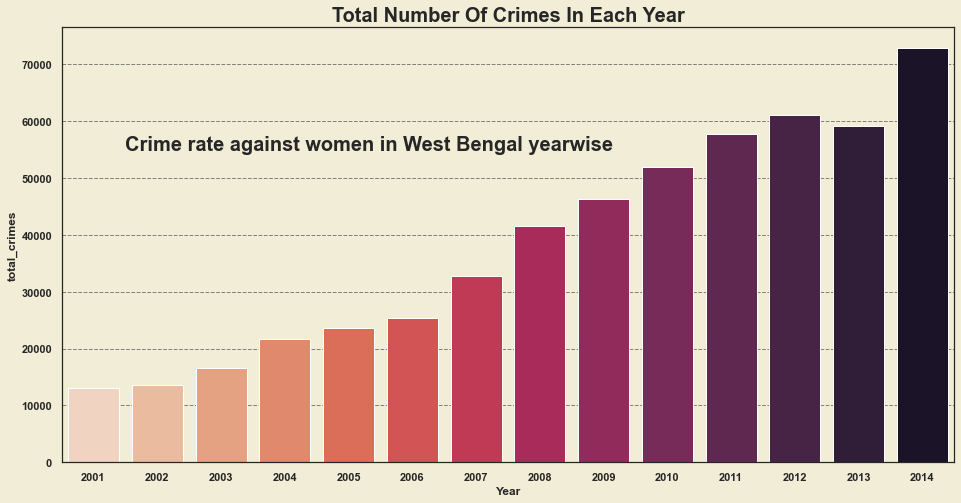

In [56]:
crime_wb=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','Total']

wb_year_data=crime_data.loc[crime_data['STATE/UT']=='west bengal']

wb_yearwise_data=pd.DataFrame()
for i in crime_wb:
    crimes_wb_data=wb_year_data.groupby(['Year'])[i].sum()
    wb_yearwise_data[i]=crimes_wb_data

print("***** Total number of crimes from in Andhra Pradesh year wise 2001 to 2014*****")
print()
wb_yearwise_data=wb_yearwise_data.sort_values(by='Total',ascending=False)
#df1_wb_yearwise
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=wb_yearwise_data,x=wb_yearwise_data.index,y='Total',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels())
plt.text(0.5,55000,"Crime rate against women in West Bengal yearwise",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)
plt.show()

<ipython-input-57-2e9533a34221>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


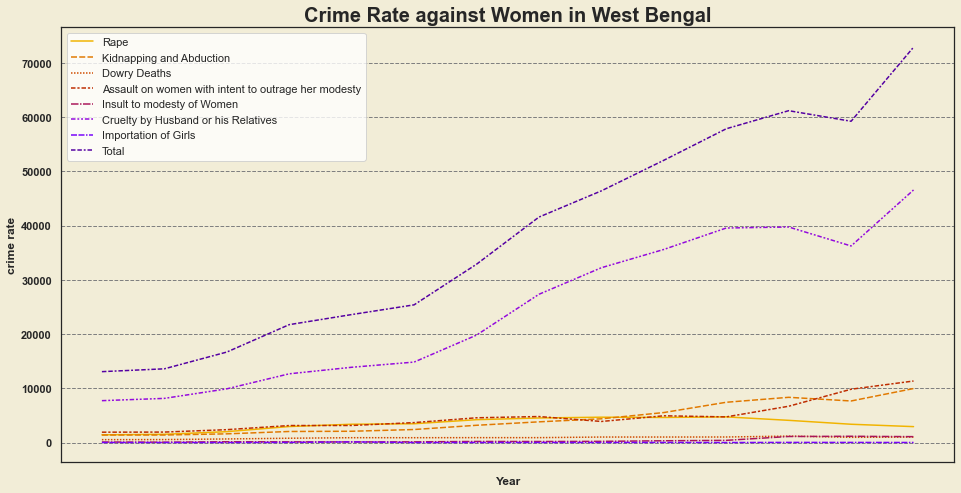

In [57]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.grid(linestyle="--",axis="y",color='gray')

a=sns.lineplot(data=wb_yearwise_data,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,60000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in West Bengal",fontweight='bold',fontsize=20)
plt.show()

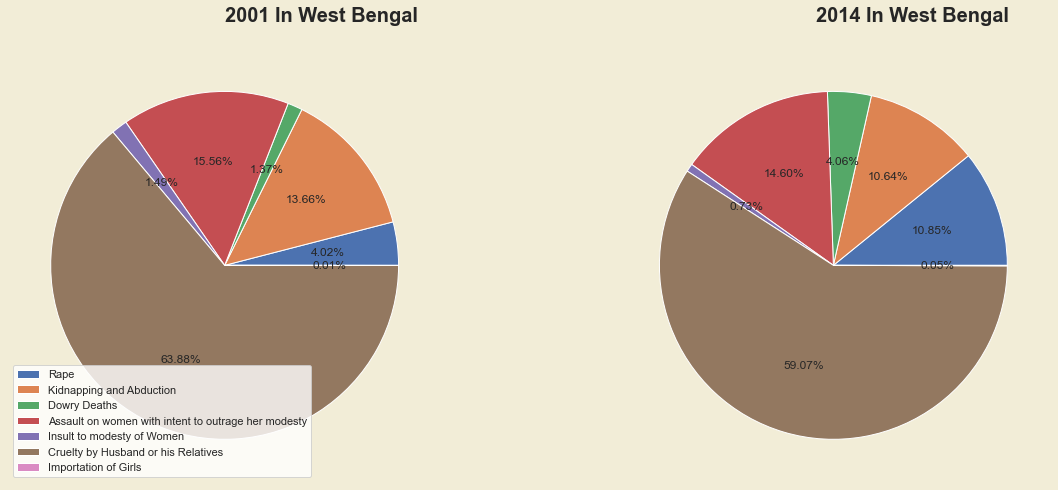

In [58]:
data_2001=wb_yearwise_data.loc[annual_crimedata.index==2001]
data_2014=wb_yearwise_data.loc[annual_crimedata.index==2014]

data_2001=data_2001.drop(["Total"],axis=1)
data_2014=data_2014.drop(["Total"],axis=1)
crimes_in_2001=list(data_2001.iloc[0])
crimes_in_2014=list(data_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%')
ax[0].text(0,1.4,"2001 In West Bengal",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%')
ax[0].text(3.4,1.4,"2014 In West Bengal",fontweight='bold',fontsize=20)
ax[0].legend(labels=data_2001.columns,loc='best')

plt.show()

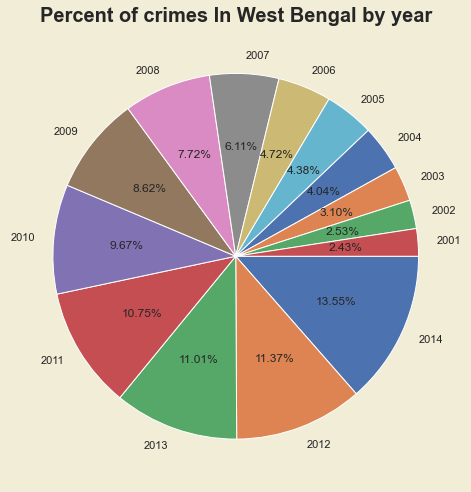

In [59]:
plt.figure(figsize=(13,7)).patch.set_facecolor("#F1EDD7FF")
plt.pie(wb_yearwise_data["Total"],labels=wb_yearwise_data.index,autopct='%1.2f%%',counterclock=False)
plt.title("Percent of crimes In West Bengal by year",fontweight='bold',fontsize=20)
plt.tight_layout()

# CORRELATION PLOT 

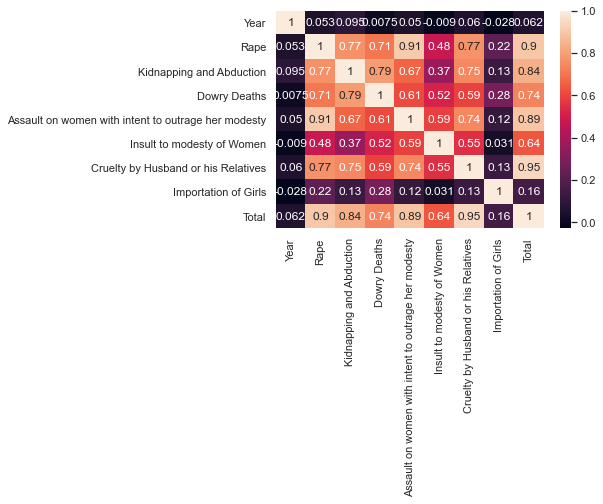

In [60]:
#Check for correlation  between crime categories 
dataplot=sns.heatmap(crime_data.corr(), annot=True)

# THANK YOU!!                                         (TEAM COLAB)